In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/raw/shotoff.csv',
               encoding='latin-1')
df

C:\Users\gabri\AppData\Local\Temp\ipykernel_16452\2830635554.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/raw/shotoff.csv',


,match_id,id,subtype,event_incident_typefk,elapsed,elapsed_plus,del,coordinates,goal_type,card_type,player1,team
0,489042,378835.0,distance,9.0,4.0,NaN,NaN,NaN,NaN,NaN,30373.0,10260.0
1,489042,378845.0,distance,9.0,5.0,NaN,NaN,NaN,NaN,NaN,37799.0,10261.0
2,489042,378995.0,deflected,317.0,22.0,NaN,NaN,NaN,NaN,NaN,24228.0,10261.0
3,489042,379075.0,distance,9.0,31.0,NaN,NaN,NaN,NaN,NaN,38807.0,10261.0
4,489042,379111.0,header,47.0,34.0,NaN,NaN,NaN,NaN,NaN,24154.0,10260.0
...,...,...,...,...,...,...,...,...,...,...,...,...
179710,2030171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179711,2030171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179712,2030171,4941072.0,shot,46.0,83.0,NaN,NaN,2766.0,NaN,NaN,629579.0,8558.0
179713,2030171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

match_id                   int64
id                       float64
subtype                   object
event_incident_typefk    float64
elapsed                  float64
elapsed_plus             float64
del                      float64
coordinates              float64
goal_type                float64
card_type                 object
player1                  float64
team                     float64
dtype: object

In [4]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [5]:
df.describe()

,match_id,id,event_incident_typefk,elapsed,elapsed_plus,del,coordinates,goal_type,player1,team
count,179715.00,95303.00,95303.00,95303.00,5972.00,57.00,42206.00,0.00,94659.00,95246.00
mean,1593054.25,2897080.05,141.90,48.84,2.48,1.00,1741.28,NaN,102955.31,9506.71
std,496191.86,1727454.33,205.42,26.34,1.44,0.00,1121.68,NaN,118955.61,9046.51
min,489042.00,375553.00,9.00,1.00,1.00,1.00,11.00,NaN,2625.00,1601.00
25%,1229164.50,1279972.50,46.00,27.00,1.00,1.00,316.00,NaN,30840.00,8534.00
50%,1778152.00,2669306.00,47.00,49.00,2.00,1.00,1866.00,NaN,39706.00,8659.00
75%,1989795.00,4483336.50,92.00,72.00,3.00,1.00,2664.00,NaN,150872.00,9875.00
max,2118418.00,5623574.00,748.00,90.00,13.00,1.00,4463.00,NaN,749661.00,208931.00


In [6]:
simple_profile = df.describe(include='all')
simple_profile

,match_id,id,subtype,event_incident_typefk,elapsed,elapsed_plus,del,coordinates,goal_type,card_type,player1,team
count,179715.00,95303.00,95114,95303.00,95303.00,5972.00,57.00,42206.00,0.00,2,94659.00,95246.00
unique,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,distance,NaN,NaN,NaN,NaN,NaN,NaN,r,NaN,NaN
freq,NaN,NaN,23110,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
mean,1593054.25,2897080.05,NaN,141.90,48.84,2.48,1.00,1741.28,NaN,NaN,102955.31,9506.71
std,496191.86,1727454.33,NaN,205.42,26.34,1.44,0.00,1121.68,NaN,NaN,118955.61,9046.51
min,489042.00,375553.00,NaN,9.00,1.00,1.00,1.00,11.00,NaN,NaN,2625.00,1601.00
25%,1229164.50,1279972.50,NaN,46.00,27.00,1.00,1.00,316.00,NaN,NaN,30840.00,8534.00
50%,1778152.00,2669306.00,NaN,47.00,49.00,2.00,1.00,1866.00,NaN,NaN,39706.00,8659.00
75%,1989795.00,4483336.50,NaN,92.00,72.00,3.00,1.00,2664.00,NaN,NaN,150872.00,9875.00


In [7]:
profile = ProfileReport(df, title="Export Data Profiling Report")

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
def get_basic_profile(dataframe):
    quantile_range = 0.5
    results = {}
    
    for column in dataframe.columns:
        count = df[column].count()
        nans = df[column].isna().sum()
        min = df[column].min()
        max = df[column].max()
        median = df[column].median()
        std = df[column].std()
        kurt = df[column].kurt()
        skew = df[column].skew()
        quant = df[column].quantile(q=quantile_range)
        
        results[column] = {'count': count,
                            'count_na': nans,
                            'min':min,
                            'max':max,
                            'median':median,
                            'std':std,
                            'kurt':kurt,
                            'skew':skew,
                            'quant {quantile_range}':quant}
 
    return results

In [10]:
num_columns = df.select_dtypes(include=['int64','float64'])
basic_profile = get_basic_profile(num_columns)
basic_profile

c:\Users\gabri\.conda\envs\migrations\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{'match_id': {'count': 179715,
  'count_na': 0,
  'min': 489042,
  'max': 2118418,
  'median': 1778152.0,
  'std': 496191.85913065955,
  'kurt': -0.46735385365582305,
  'skew': -1.002223252860038,
  'quant {quantile_range}': 1778152.0},
 'id': {'count': 95303,
  'count_na': 84412,
  'min': 375553.0,
  'max': 5623574.0,
  'median': 2669306.0,
  'std': 1727454.3328089109,
  'kurt': -1.5335738070424443,
  'skew': 0.08824670212083026,
  'quant {quantile_range}': 2669306.0},
 'event_incident_typefk': {'count': 95303,
  'count_na': 84412,
  'min': 9.0,
  'max': 748.0,
  'median': 47.0,
  'std': 205.42489529484942,
  'kurt': 1.2563895547570474,
  'skew': 1.675003821470613,
  'quant {quantile_range}': 47.0},
 'elapsed': {'count': 95303,
  'count_na': 84412,
  'min': 1.0,
  'max': 90.0,
  'median': 49.0,
  'std': 26.339633025211988,
  'kurt': -1.1800495320117126,
  'skew': -0.0613057683486507,
  'quant {quantile_range}': 49.0},
 'elapsed_plus': {'count': 5972,
  'count_na': 173743,
  'min': 1.0

Text(0.5, 1.0, 'Histogram of shotoff per player')

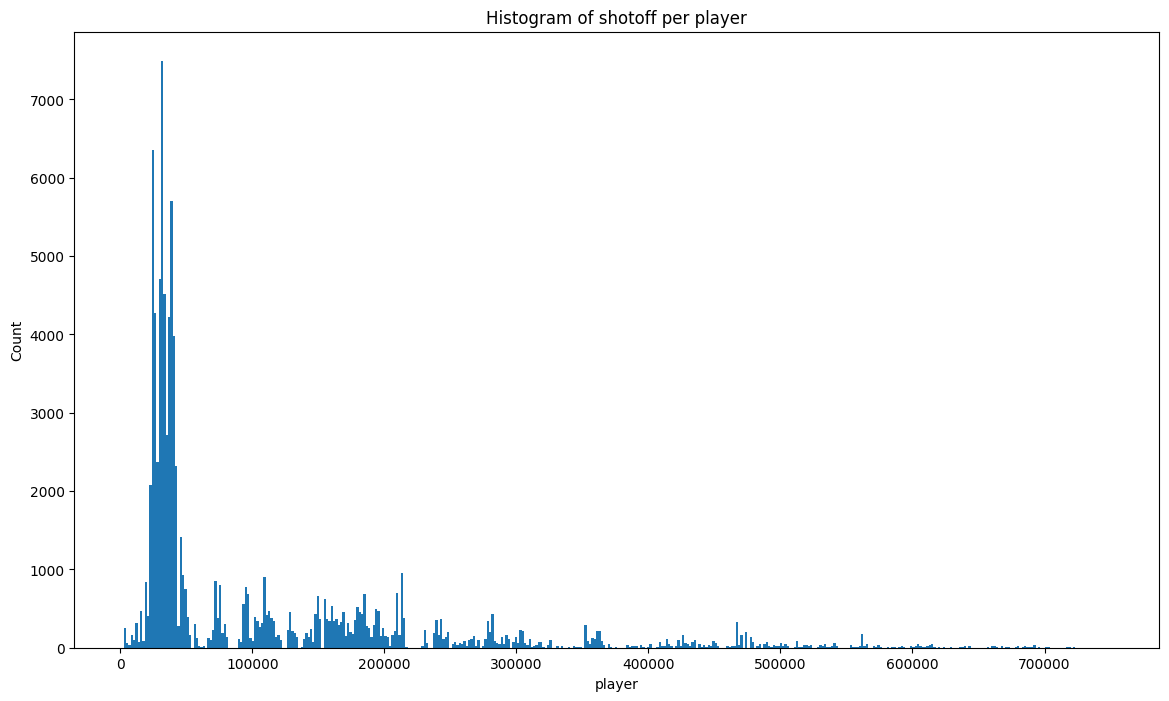

In [12]:
# square root choice
bins = int(np.ceil(np.sqrt(len(num_columns['player1']))))
 
fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.hist(num_columns['player1'], bins)
 
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('player')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of shotoff per player')
# plt.savefig("mygraph.jpg")